In [1]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [ ]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

1. fanme : 다운로드한 파일의 이름 재지정
2. origin : 해당 URL에서 데이터를 다운로드
3. extract : 다운로드한 압축 파일의 압축 해제 여부

In [4]:
print(data_set)

C:\Users\gypsi\.keras\datasets\imdb.tar.gz


In [2]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [3]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

In [39]:
a=os.path.dirname("C:\\Users\\gypsi\\.keras\\datasets\\imdb.tar.gz")
a

'C:\\Users\\gypsi\\.keras\\datasets'

In [13]:
#train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
#test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

#train_df = data(os.path.join(os.path.dirname("C:\\Users\\gypsi\\.keras\\datasets\\imdb.tar.gz"), "aclImdb", "train"))
#est_df = data(os.path.join(os.path.dirname("C:\\Users\\gypsi\\.keras\\datasets\\imdb.tar.gz"), "aclImdb", "test"))

In [14]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [15]:
reviews = list(train_df['review'])

In [19]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]

In [20]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

In [21]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

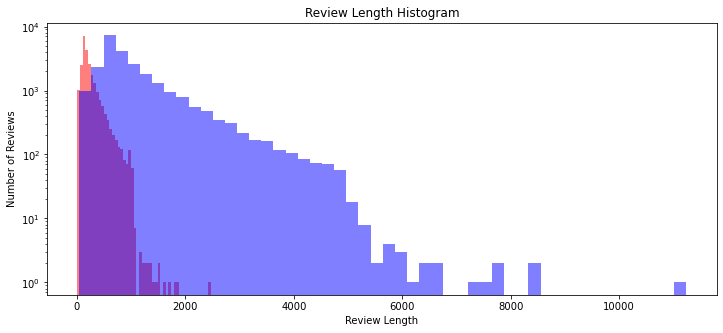

In [29]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log',nonpositive='clip') # nonposy가 현재 버전은 nonpositive로 바뀌었음
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [40]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x19026ff0e50>,
 'caps': [<matplotlib.lines.Line2D at 0x190270004f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19026ff0b80>],
 'medians': [<matplotlib.lines.Line2D at 0x190270009d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19027000f70>],
 'means': [<matplotlib.lines.Line2D at 0x19027000ca0>]}

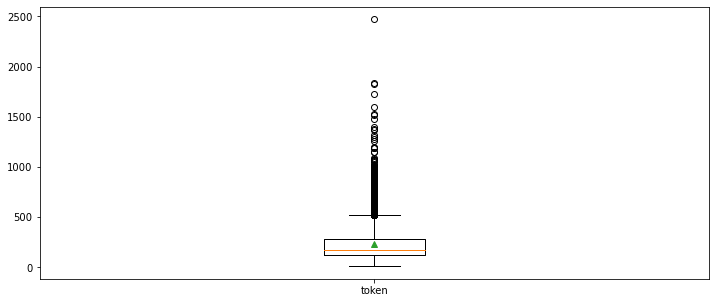

In [41]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1902709d070>,
 'caps': [<matplotlib.lines.Line2D at 0x1902709d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1902708feb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1902709dbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x190270ea1c0>],
 'means': [<matplotlib.lines.Line2D at 0x1902709deb0>]}

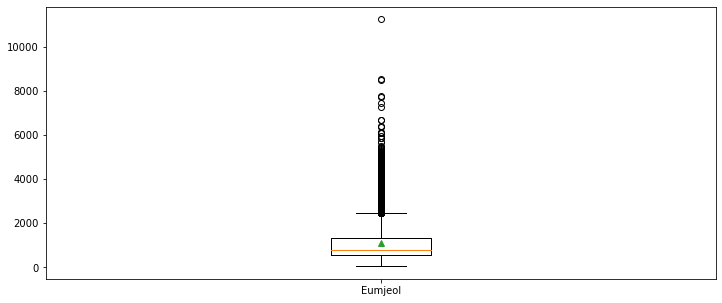

In [42]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

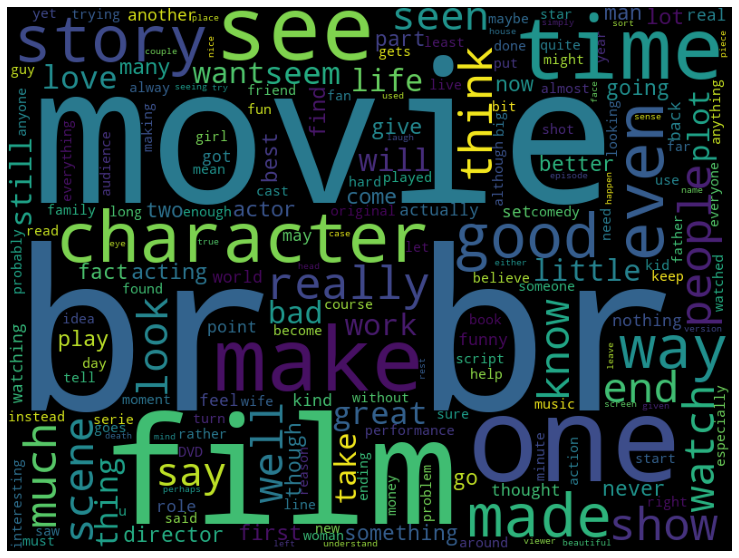

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

C:\Users\gypsi\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

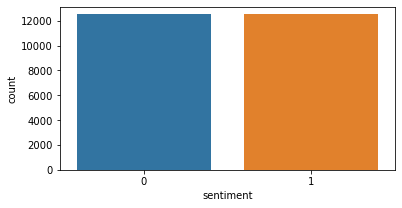

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])

In [51]:
print(sentiment)

1    12500
0    12500
Name: sentiment, dtype: int64
